## Muon flux calculator

@This script calculates the muon flux trough a detector used by the Quantum compuing group in IFAE, Barcelona

@author: MoonPenguin

In [1]:
###Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as integrate
import functions as mf
plt.style.use('coolplot.mplstyle')

In [3]:
### Import files
df = pd.read_csv('muon_counter_data.csv')  #,header=1,nrows=4)

In [4]:
### Set arrays
num_datapoints = 20 #how many points to generate for the model (# of the x axis values) 
beta = np.linspace(0, 89, num_datapoints) # defining the points between 0 and 89 degrees (we don't use 90deg because of numerical overflow problems) 

In [5]:
################### Flux intensity ##################### 

F0 = 0.42 #0.498 # the constant of the flux (this is a parameter to be sweeped)

# Calculations for the detector

In [6]:
################### Dimensions of the scintillators ##################### 

height = 1.5 # all units in "cm"  of the detector, height is the distance between the scintillators
width = 3  
length = 25

In [7]:
################### Fudge factor of the scintillators ##################### 

fudge_distance1 = 0.15
fudge_distance2 = fudge_distance1  # we assume them to be the same

In [8]:
################### Assign new valus of the dimension + get the apertures ##################### 

height, width, length, phi, alpha = mf.fudger (height, width, length, fudge_distance1, fudge_distance2)
print (height, width, length)

The angle of the width aperture is: 112.61986494804043 degrees
The angle of the length aperture is: 171.663934046505 degrees
1.8 2.7 24.7


In [9]:
################### Put in corrections for the chassis tilt #####################

df['average_cpm_coincidental'] = mf.chassis_tilt (16.8/15.58 , df['average_cpm_coincidental']) 

# Calculations for the chip

In [10]:
################### Dimensiosn of a chip ##################### 

height2 = 0.0001  # all units in "cm"  of the detector, height is the distance between the scintillators
width2 = 0.5 ## cm
length2 = 0.5 ## cm

# height2 = 1.8  # all units in "cm"  of the detector, height is the distance between the scintillators
# width2 = 1 ## cm
# length2 = 1 ## cm


phi2 = 2*np.arctan(width2/height2) # gives the aperture angles of the detector in radians
print ('The angle of the width aperture for a chip is:',phi2*180/np.pi,"degrees")
alpha2 = 2*np.arctan(length2/height2)                    
print ('The angle of the length aperture for a chip is:',alpha2*180/np.pi,"degrees")


The angle of the width aperture for a chip is: 179.97708168850033 degrees
The angle of the length aperture for a chip is: 179.97708168850033 degrees


# Calculate the results

In [11]:
integral_table1 = np.linspace(0,1,num_datapoints)
integral_table2 = np.linspace(0,1,num_datapoints)

beta_in_rad=(np.pi/180)*beta # convert the beta degrees to radians

for i in range(num_datapoints):
    integral_table1[i] = mf.integral_of_the_flux (beta_in_rad[i], alpha, phi, height, width, length, F0, 15, clear_sky = False)
    integral_table2[i] = mf.integral_of_the_flux (beta_in_rad[i], alpha2, phi2, height2, width2, length2, F0, clear_sky = True)
    print("Progress:", int(100*(i+1)/len(beta)),"%")

Progress: 5 %
Progress: 10 %
Progress: 15 %
Progress: 20 %
Progress: 25 %
Progress: 30 %
Progress: 35 %
Progress: 40 %
Progress: 45 %
Progress: 50 %
Progress: 55 %
Progress: 60 %
Progress: 65 %
Progress: 70 %
Progress: 75 %
Progress: 80 %
Progress: 85 %


C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 90 %
Progress: 95 %
Progress: 100 %


## Adding the data from ALBA 

In [12]:
data = {'angle':[0.,90.],'average_cpm_coincidental':[17.0, 5.69]}
df_alba = pd.DataFrame(data)

In [13]:
df_alba

,angle,average_cpm_coincidental
0,0.0,17.00
1,90.0,5.69


# Plotting the results

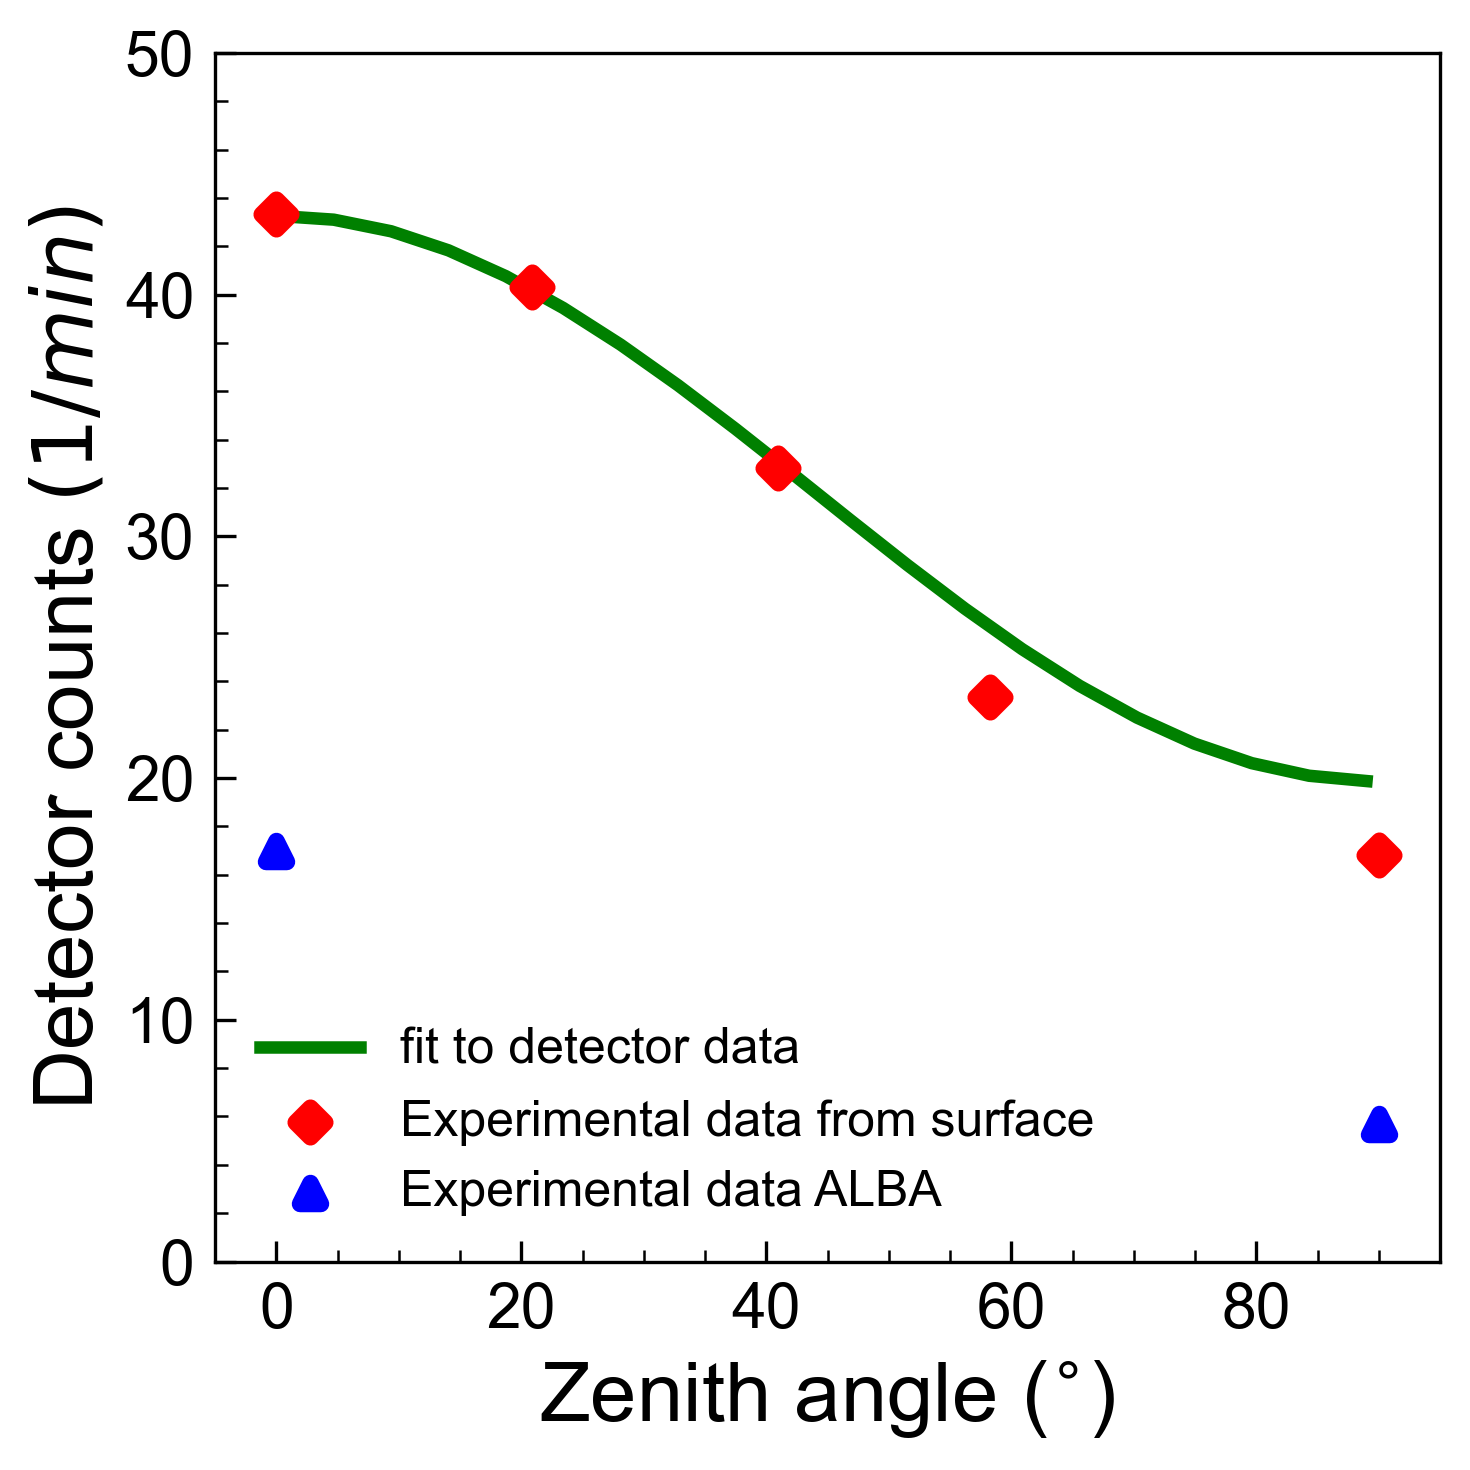

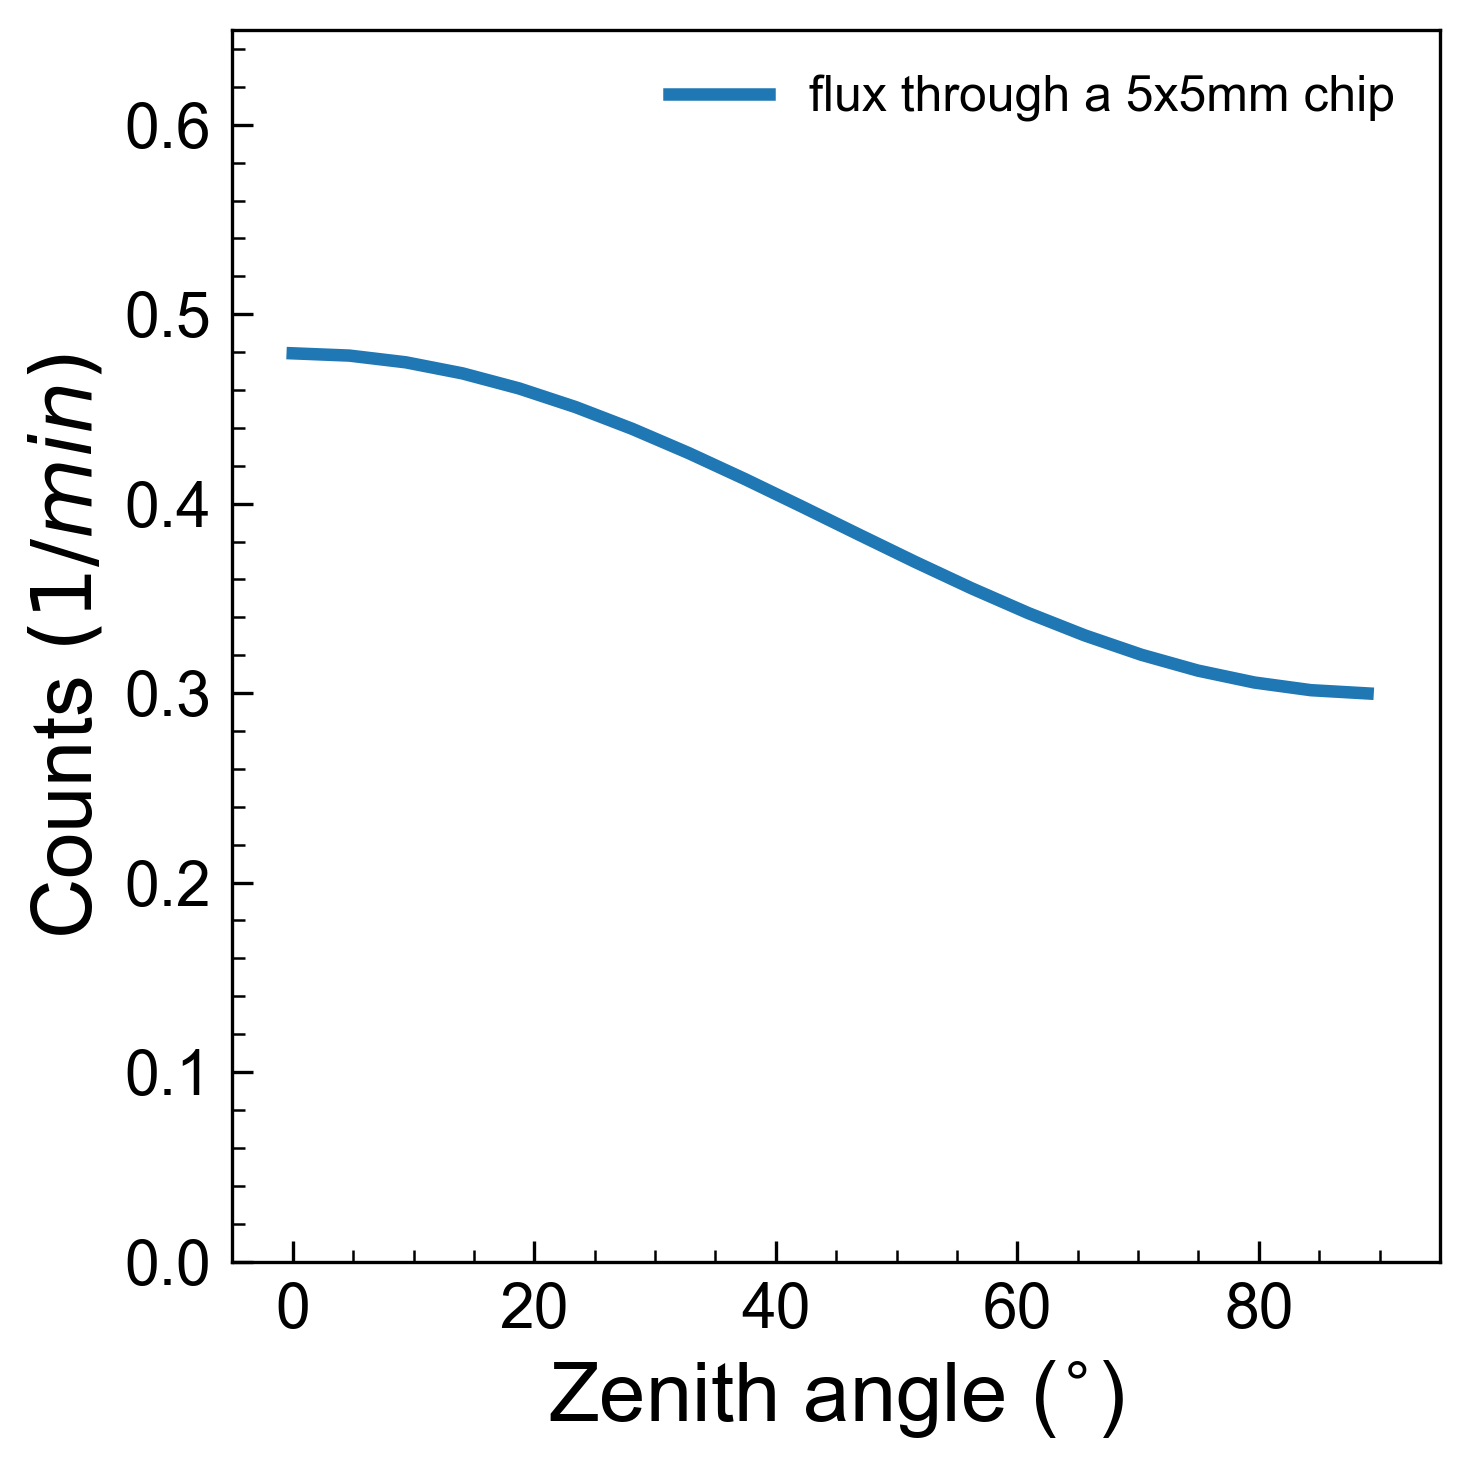

In [14]:
fontsize_axes = 20
dpi = 300
fig1, (ax1) = plt.subplots(1, 1, figsize = (5, 5), dpi = dpi)
ax1.plot(beta, integral_table1, linewidth=3, label = "fit to detector data", color = 'g', zorder=1)

# ax1.errorbar(df['angle'], df['average_cpm_coincidental'], yerr=df['average_cpm_coincidental_error'], xerr=1, 
#              fmt=".", linewidth=1, color = 'r', label='Experimental data')

# ax1.errorbar(df['angle'], df['average_cpm_coincidental'], yerr=df['average_cpm_coincidental_error'], xerr=1, 
#              uplims = True, lolims = True, fmt=".", linewidth=1, color = 'r', label='Experimental data')
ax1.scatter(df['angle'], df['average_cpm_coincidental'], c='r', marker = "D", linewidths=4, label='Experimental data from surface', zorder=2)
ax1.scatter(df_alba['angle'], df_alba['average_cpm_coincidental'], c='blue', marker = "^", linewidths=4, label='Experimental data ALBA', zorder=2)
# ax1.plot(beta,integral_table2,linewidth=3,label = "chip " )


ax1.set_xlabel('Zenith angle ($^{\circ}$)', fontsize=fontsize_axes)
ax1.set_ylabel('Detector counts $(1/min)$', fontsize=fontsize_axes)
# ax1.set_title('$Muon$ $impacts$ $per$ $minute$ $for$ $1x1 cm$ $chip$', fontdict=None, loc='center', pad=None)

# ax1.set_ylim([10,50])
ax1.set_ylim([0,50])
ax1.set_xlim([-5,95])
ax1.legend(prop={'size': 12})

ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.tick_params(axis='both', which='minor', labelsize=10)

######

fig2, (ax2) = plt.subplots(1, 1, figsize = (5, 5), dpi = dpi)
ax2.plot(beta, integral_table2, linewidth=3, label = "flux through a 5x5mm chip" )


ax2.set_xlabel('Zenith angle ($^{\circ}$)', fontsize=fontsize_axes)
# ax1.set_ylabel('$Detector$ $counts$ $(1/min)$', fontsize=12)
ax2.set_ylabel('Counts $(1/min)$', fontsize=fontsize_axes)
# ax1.set_title('$Muon$ $impacts$ $per$ $minute$ $for$ $1x1 cm$ $chip$', fontdict=None, loc='center', pad=None)

# ax2.set_ylim([0.3,0.65])
ax2.set_ylim([0,0.65])
ax2.set_xlim([-5,95])
ax2.legend(prop={'size': 12})

ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='minor', labelsize=10)

plt.plot()

fig1.savefig('final_fit_muons.png')
fig2.savefig('Plot_chip_flux.png')


In [65]:
df['average_cpm_coincidental']

0    43.350000
1    40.314050
2    32.826836
3    23.344978
4    16.810783
Name: average_cpm_coincidental, dtype: float64

In [66]:
integral_table1[0]/integral_table1[-1]

2.176464631886905

In [67]:
df['average_cpm_coincidental'][0]/df['average_cpm_coincidental'][4]

2.578702006780903

# Exploring what happens with different shadow angles

In [68]:
num_angles = 10
angles = np.linspace (0, 90, num_angles)
integral_table = np.empty([num_datapoints, num_angles])


beta_in_rad=(np.pi/180)*beta # convert the beta degrees to radians

for j in range (num_angles):
    mask_angle = angles[j]
    print("Progress:", int(100*(j+1)/num_angles),"%")
    for i in range(num_datapoints): # loop through all the angles
        integral_table[i,j] = mf.integral_of_the_flux (beta_in_rad[i], alpha, phi, height, width, length, F0, mask_angle, clear_sky = False)

Progress: 10 %
Progress: 20 %
Progress: 30 %


C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Progress: 40 %
Progress: 50 %
Progress: 60 %
Progress: 70 %
Progress: 80 %
Progress: 90 %
Progress: 100 %


In [69]:
angles

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [70]:
integral_table[:,0]

array([43.36589513, 43.21691364, 42.77394203, 42.04880551, 41.06085067,
       39.83643362, 38.40821658, 36.81429828, 35.0971976 , 33.30271933,
       31.47873233, 29.67389271, 27.93634575, 26.3124417 , 24.84549932,
       23.57465034, 22.53379554, 21.75070051, 21.246255  , 21.03391585])

In [71]:
integral_table[0,0] / integral_table[-1,0]

2.061712875512998

In [72]:
ratios = []
for m in range(integral_table.shape[1]):
    ratio_m = integral_table[0,m] / integral_table[-1,m]
    ratios.append(ratio_m)

In [73]:
ratios

[2.061712875512998,
 2.1258501447603453,
 2.2485454455293814,
 2.4853475958539817,
 2.9098094749802508,
 3.6697767786220012,
 5.166283650171838,
 8.944280197672999,
 28.759113426351096,
 1.0]

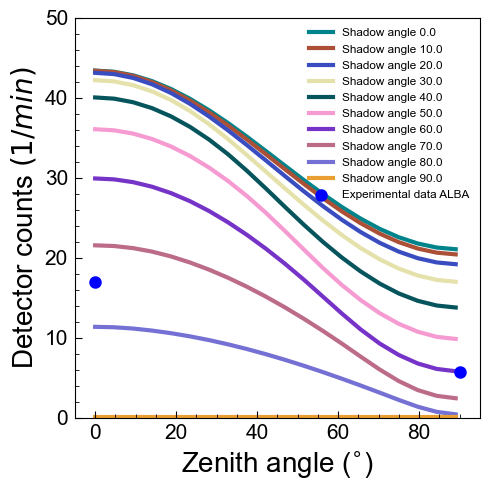

In [74]:
fontsize_axes = 20
dpi = 100
fig3, (ax1) = plt.subplots(1, 1, figsize = (5, 5), dpi = dpi)

for j in range (num_angles):
    
    # ax1.plot(beta, integral_table[:,j], linewidth=3, label = "fit to detector data", color = 'g', zorder=1)
    ax1.plot(beta, integral_table[:,j], linewidth=3, label = "Shadow angle {0}".format(angles[j]), c=np.random.rand(3,), zorder=1)


# ax1.errorbar(df['angle'], df['average_cpm_coincidental'], yerr=df['average_cpm_coincidental_error'], xerr=1, 
#              uplims = True, lolims = True, fmt=".", linewidth=1, color = 'r', label='Experimental data')

ax1.scatter(df_alba['angle'], df_alba['average_cpm_coincidental'], c='blue', linewidths=4, label='Experimental data ALBA', zorder=2)
ax1.set_xlabel('Zenith angle ($^{\circ}$)', fontsize = fontsize_axes)
ax1.set_ylabel('Detector counts $(1/min)$', fontsize = fontsize_axes)
# ax1.set_title('$Muon$ $impacts$ $per$ $minute$ $for$ $1x1 cm$ $chip$', fontdict=None, loc='center', pad=None)


# ax1.set_ylim([10,50])
ax1.set_ylim([0,50])
ax1.set_xlim([-5,95])
ax1.legend(prop = {'size': 8.5})


ax1.tick_params(axis = 'both', which = 'major', labelsize=15)
ax1.tick_params(axis = 'both', which = 'minor', labelsize=10)

fig3.savefig('shadow_angle_variation.png')

## Plotting the ratios of the flux at 0 and at 90 degrees (as a function of various shadow angles)

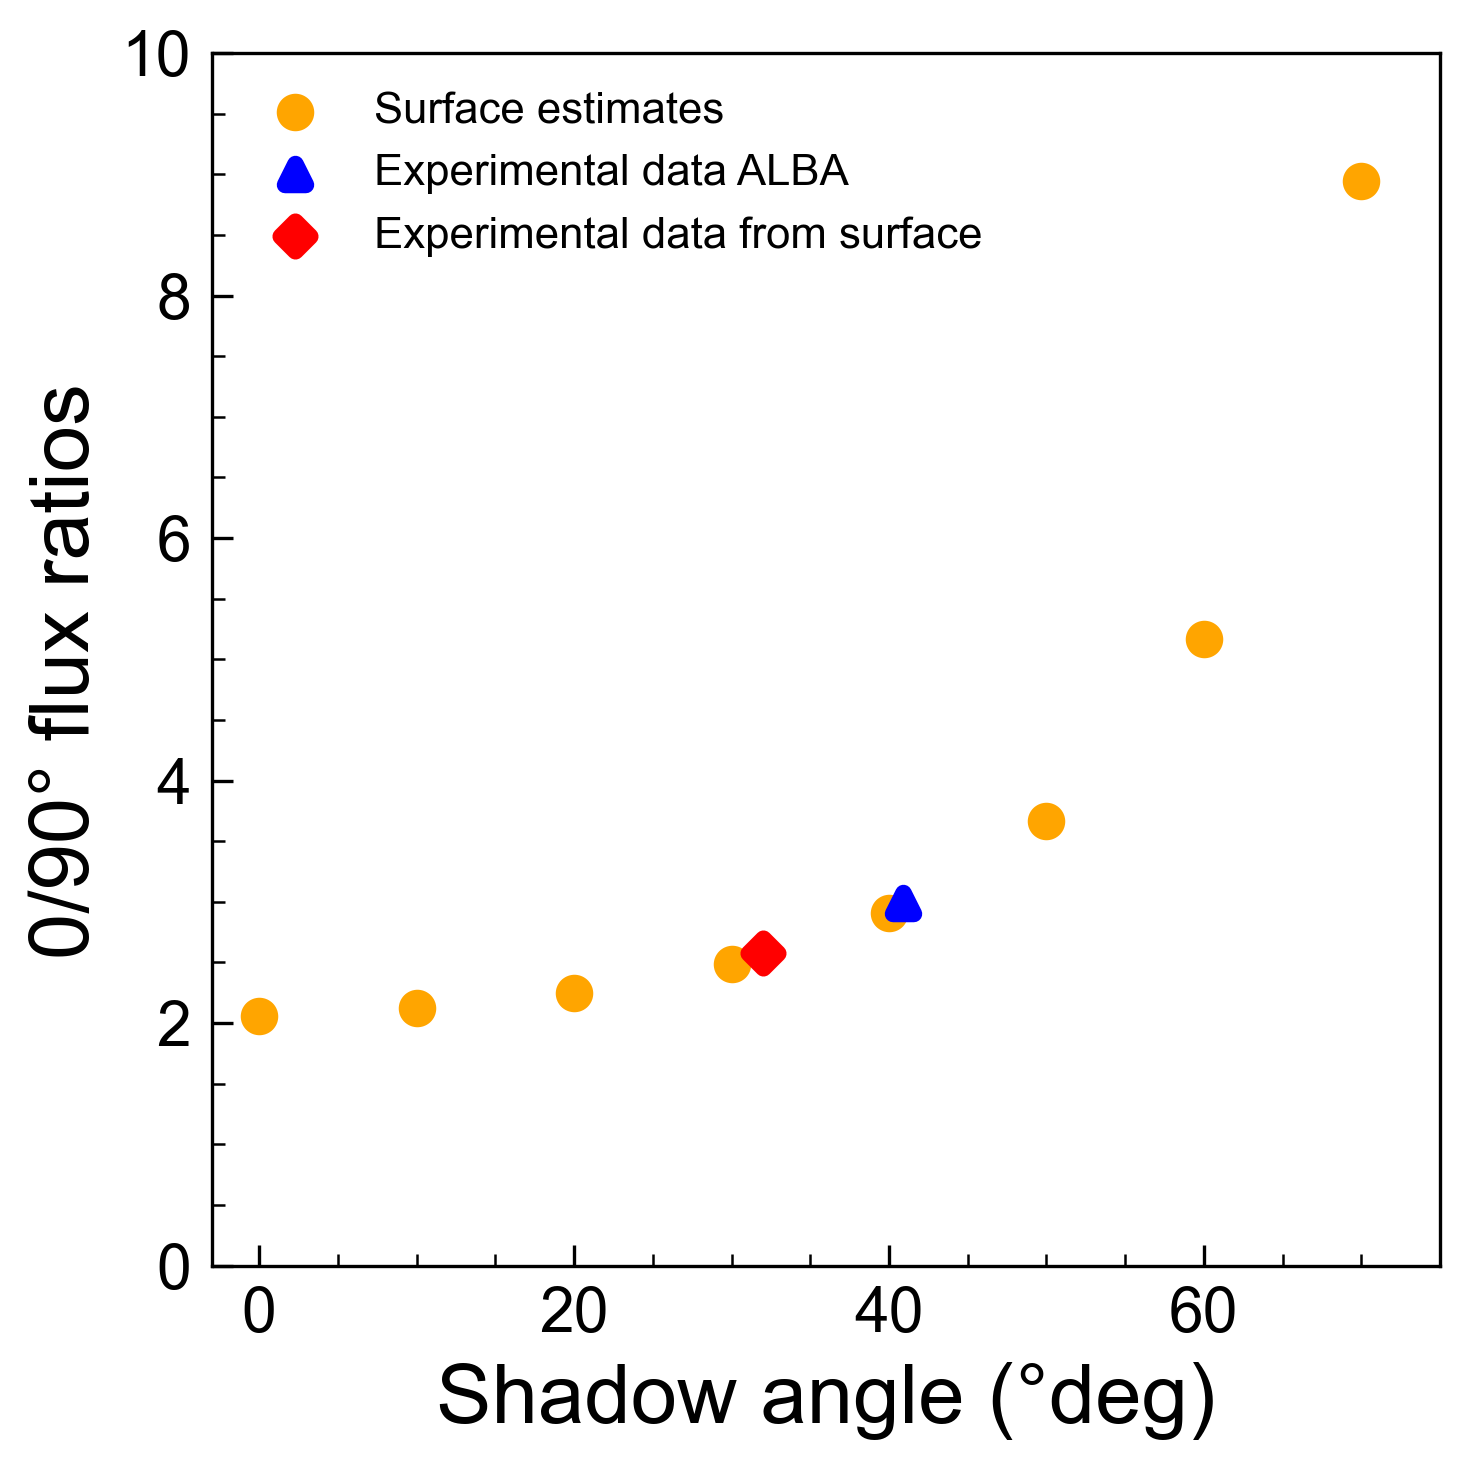

In [78]:
fontsize_axes = 20
dpi = 300
fig4, (ax6) = plt.subplots(1, 1, figsize = (5, 5), dpi = dpi)

ax6.scatter(angles, ratios, linewidths=4, c="orange", label='Surface estimates')

# Alba_datapoint
point = df_alba['average_cpm_coincidental'][0]/df_alba['average_cpm_coincidental'][1]
# Above ground point
point2 = df['average_cpm_coincidental'][0]/df['average_cpm_coincidental'][4]

ax6.scatter(40.9, point, c='blue', marker = "^", linewidths=4, label='Experimental data ALBA', zorder=2)
ax6.scatter(32., point2, c='red', marker = "D", linewidths=4, label='Experimental data from surface', zorder=3)

ax6.set_xlabel('Shadow angle (°deg)', fontsize = fontsize_axes)
ax6.set_ylabel('0/90° flux ratios ', fontsize = fontsize_axes)
# ax1.set_title('$Muon$ $impacts$ $per$ $minute$ $for$ $1x1 cm$ $chip$', fontdict=None, loc='center', pad=None)


# ax1.set_ylim([10,50])
ax6.set_ylim([0,10])
ax6.set_xlim([-3,75])
ax6.legend(prop = {'size': 10.5})


ax6.tick_params(axis = 'both', which = 'major', labelsize=15)
ax6.tick_params(axis = 'both', which = 'minor', labelsize=10)

fig4.savefig('shadow_angle_vs_0-90_ratio.png')

In [76]:
point

2.987697715289982